Exploration on the data using matplotlib and seaborn

Different Classifier models to predict the quality of wine -> Random Forest Classifier, Stochastic Gradient Descent Classifier, Support Vector Classifier

Cross Validaiton Evaluation technique to optimize model performance

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
%matplotlib inline

In [2]:
#Loading the dataset
wine = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Axes: xlabel='quality', ylabel='fixed acidity'>

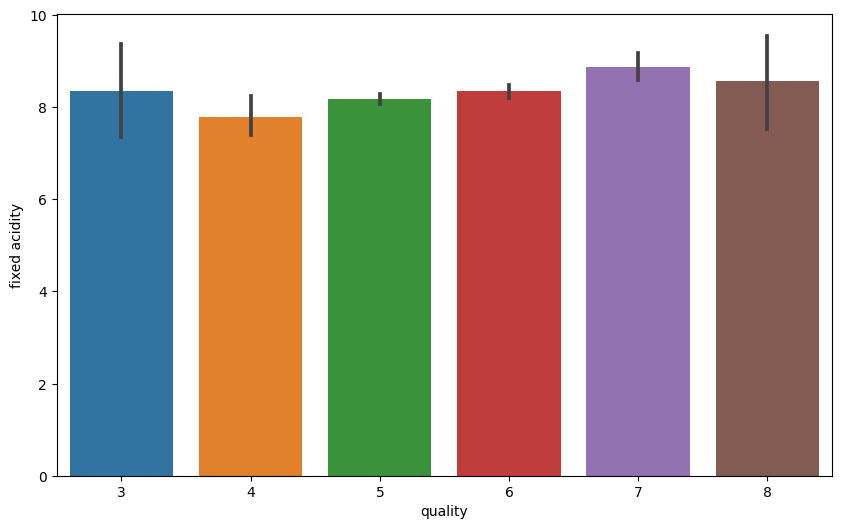

In [5]:
# We see that fixed acidity doesn't give any specification to classify the quality
fig = plt.figure(figsize=(10,6))
sns.barplot(x="quality", y='fixed acidity', data=wine)

<Axes: xlabel='quality', ylabel='volatile acidity'>

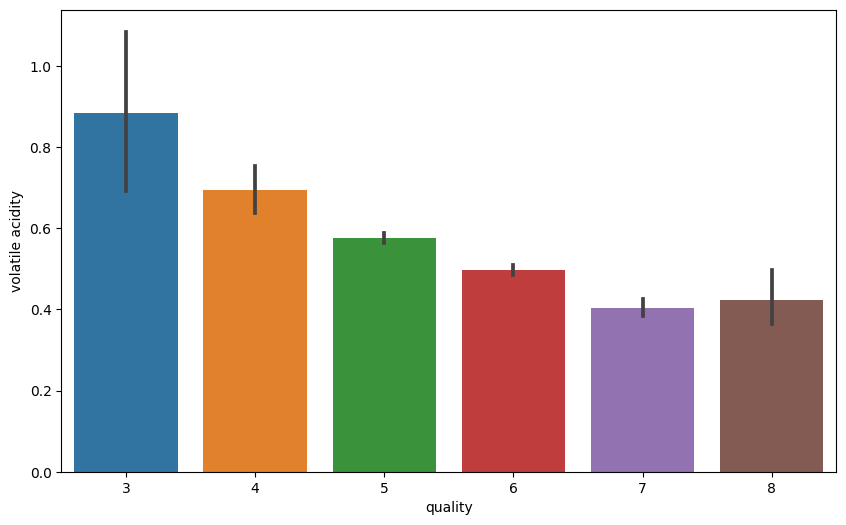

In [6]:
# We see that it's quite a downing trend in the volatile acidity as we go higher the quality
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality', y="volatile acidity", data=wine)

<Axes: xlabel='quality', ylabel='citric acid'>

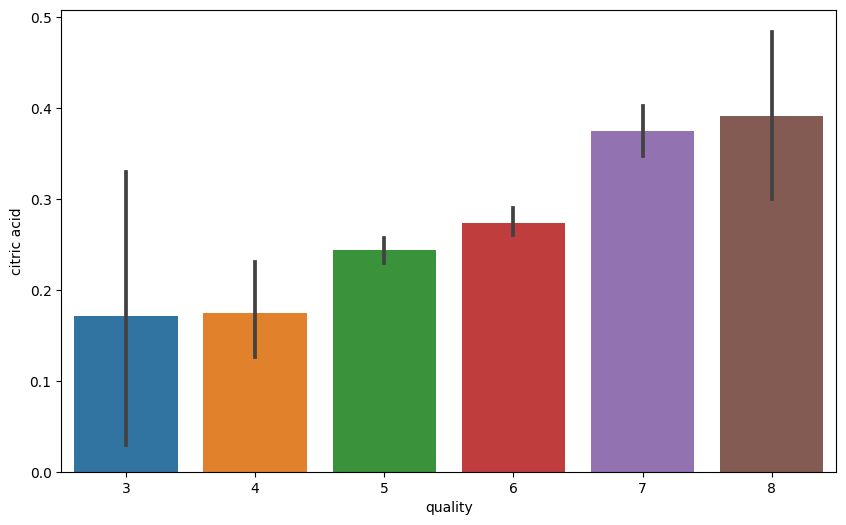

In [7]:
# Citric acid go higher as we go higher in the quality of wine
fig = plt.figure(figsize=(10,6))
sns.barplot(x="quality", y="citric acid", data=wine)

<Axes: xlabel='quality', ylabel='residual sugar'>

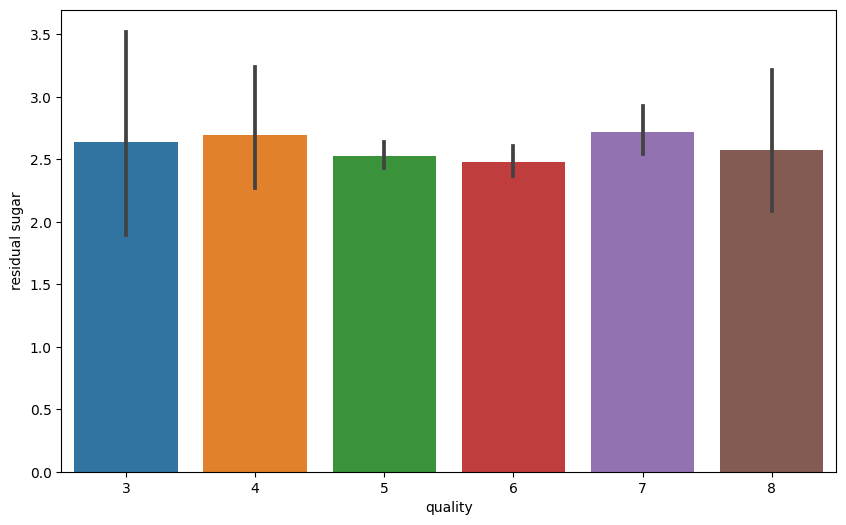

In [8]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='residual sugar', data=wine)

<Axes: xlabel='quality', ylabel='chlorides'>

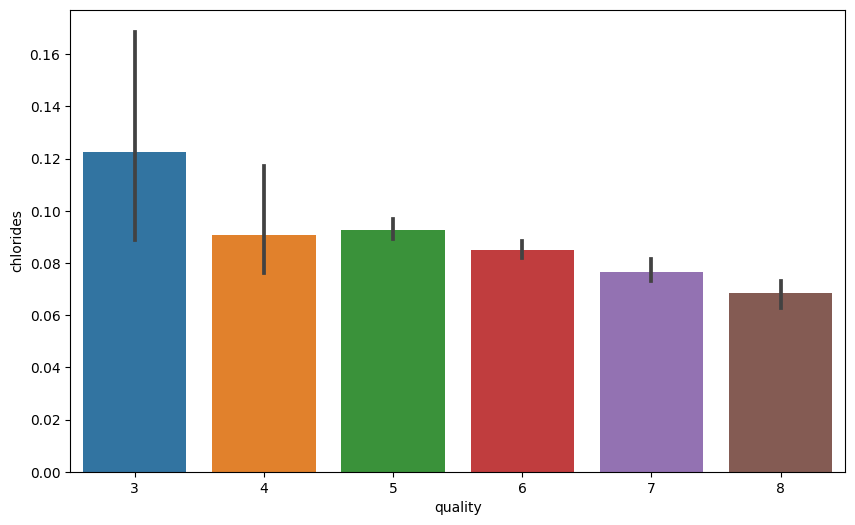

In [9]:
# Chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize=(10,6))
sns.barplot(x="quality", y="chlorides", data=wine)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

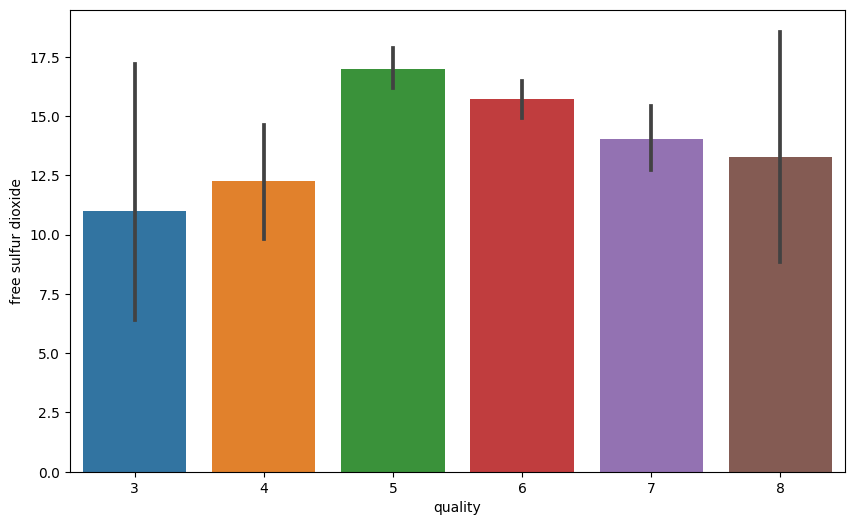

In [10]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x="quality", y="free sulfur dioxide", data=wine)

<Axes: xlabel='quality', ylabel='sulphates'>

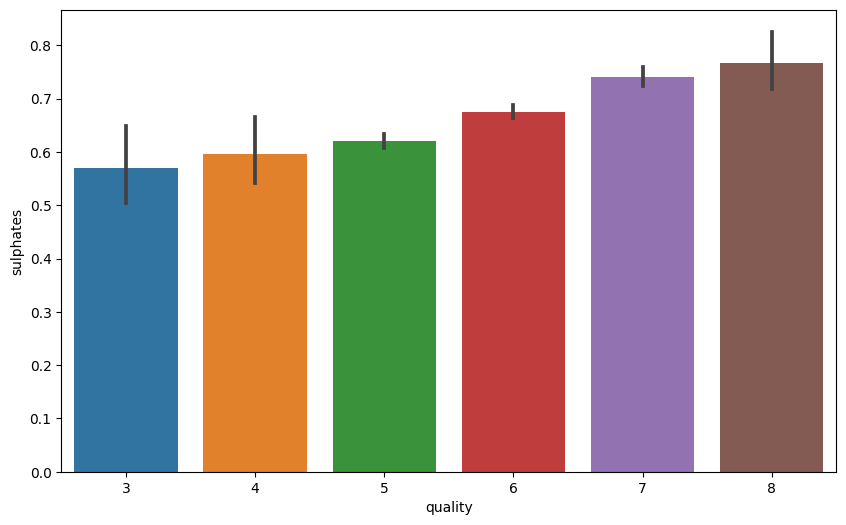

In [11]:
# Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize=(10,6))
sns.barplot(x="quality", y="sulphates", data=wine)

<Axes: xlabel='quality', ylabel='alcohol'>

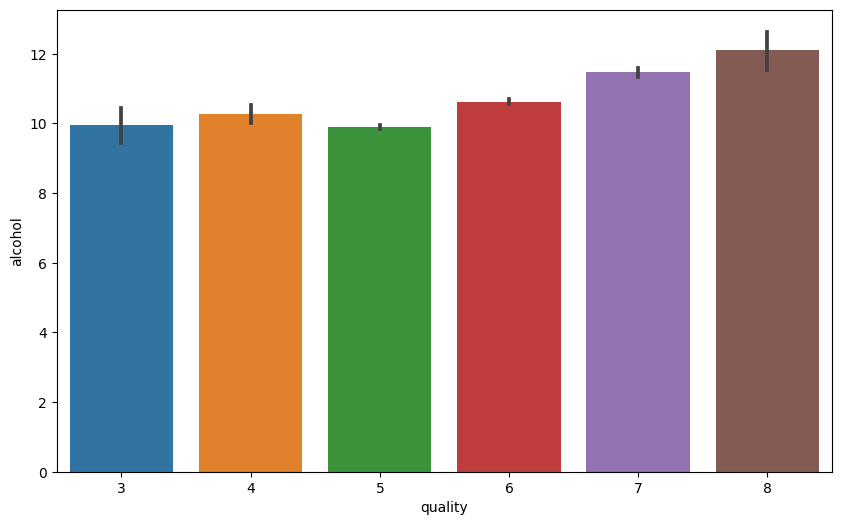

In [12]:
# Alcohol level also goes higher as the quality of wine increases
fig = plt.figure(figsize=(10,6))
sns.barplot(x="quality", y="alcohol", data=wine)

**Preprocessing Data for performing ML Algorithms**

In [13]:
# Converting continuous numerical values into discrete categories
bins = (2, 6.5, 8)
group_names = ["bad", 'good']
wine["quality"] = pd.cut(wine["quality"], bins=bins, labels=group_names) # pd.cut() is a pandas function used to segment and sort data values into bins or intervals

In [14]:
label_quality = LabelEncoder()

In [15]:
# Label Encoding -> Bad becomes 0 and good becomes 1
wine["quality"] = label_quality.fit_transform(wine["quality"])

In [16]:
wine["quality"].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

<Axes: ylabel='count'>

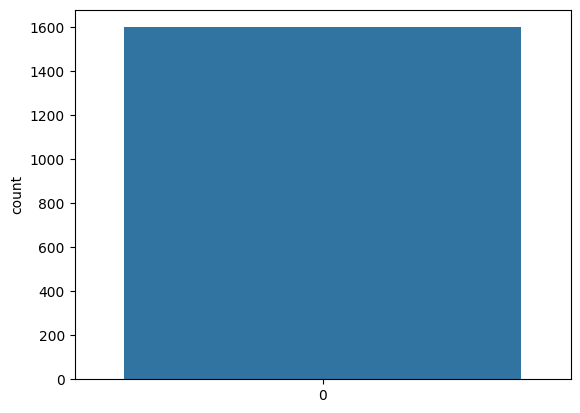

In [17]:
# countplot shows the count of observations in each categorical bin using bars
sns.countplot(wine["quality"])

In [18]:
X = wine.drop("quality", axis=1)
y = wine['quality']

In [19]:
# Train and Test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Applying Standard Scaling to get optimized result
sc = StandardScaler()

In [21]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Training and Testing data is ready now to perform ml algorithm

**Random Forest Classifier**

In [22]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [23]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.74      0.53      0.62        47

    accuracy                           0.90       320
   macro avg       0.83      0.75      0.78       320
weighted avg       0.90      0.90      0.90       320



In [24]:
# Confusion Matrix for the Random Forest Classification
print(confusion_matrix(y_test, pred_rfc))

[[264   9]
 [ 22  25]]


**Stochastic Gradient Decent Classifier**

In [25]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)

pred_sgd = sgd.predict(X_test)

In [26]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       273
           1       0.44      0.53      0.48        47

    accuracy                           0.83       320
   macro avg       0.68      0.71      0.69       320
weighted avg       0.85      0.83      0.84       320



In [27]:
print(confusion_matrix(y_test, pred_sgd))

[[241  32]
 [ 22  25]]


**Support Vector Classifier**

In [28]:
svc = SVC()
svc.fit(X_train, y_train)

pred_svc = svc.predict(X_test)

In [29]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



**Let's try to increase the accuracy of models**

**Grid Search CV**

it tries every possible combination of hyperparameters, computationally expensive, doesn't scale well with more hyperparameters

In [30]:
#Finding the best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

grid_svc = GridSearchCV(svc, param_grid=param, scoring="accuracy", cv=10)

#param_grid -> specifies hyperparameters and their possible values that you want to optimize
#Grid Search will try every combination of these parameters to find the set that has the best accuracy on cross-validation set

In [31]:
grid_svc.fit(X_train, y_train)

#When you call fit() on GridSearchCV it tries each combination of hyperparameters and for each combination of hyperparameters
#GridSearchCV performs cross validation, it splits the training data into n folds, it trains the model on n-1 folds and evaluates it on the remaining fold
#Repeating this process n times, each time using different fold for evaluation. 
#After evaluating all combinations, GridSearchCV identifies combination of parameters that has the highest cross-validation accuracy

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [32]:
#Best Parameters for our SVC model
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [33]:
#Let's run our SVC again with the best parameters
svc2 = SVC(C=1.2, gamma=0.9, kernel="rbf")
svc2.fit(X_train, y_train)

pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.85      0.36      0.51        47

    accuracy                           0.90       320
   macro avg       0.88      0.68      0.72       320
weighted avg       0.89      0.90      0.88       320



**Cross Validation Score for Random Forest and SGD**

In [34]:
#Let's try to do some evaluation for random forest model using cross validation
rfc_eval = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=10)
rfc_eval.mean()

0.9108882874015748